In [ ]:
import cv2
import os
import random
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = "/content/drive/MyDrive/Dataset/"

In [ ]:
path_file = []
label_file = []
file_name = []

for path, label, files in os.walk(dataset_dir):
  for name in files:
    path_file.append(os.path.join(path, name))
    label_file.append(path.split('/')[-1])
    file_name.append(name)

In [ ]:
df = pd.DataFrame({"path" : path_file, "label" : label_file, "name" : file_name})
group = df.groupby(['label']).size()

In [ ]:
df.sample(10)

,path,label,name
27,/content/drive/MyDrive/Dataset/Garnier Acno Fi...,Garnier Acno Fight,IMG20230528181434.jpg
47,/content/drive/MyDrive/Dataset/Garnier Acno Fi...,Garnier Acno Fight,IMG20230528181453.jpg
395,/content/drive/MyDrive/Dataset/Indomie Ayam Sp...,Indomie Ayam Spesial,IMG20230526133228.jpg
295,/content/drive/MyDrive/Dataset/Rexona Antibact...,Rexona Antibacterial,IMG20230510185413.jpg
556,/content/drive/MyDrive/Dataset/Sunlight/IMG202...,Sunlight,IMG20230526133441_01.jpg
439,/content/drive/MyDrive/Dataset/Indomie Ayam Sp...,Indomie Ayam Spesial,IMG20230526133312_01.jpg
262,/content/drive/MyDrive/Dataset/Garnier Turbo B...,Garnier Turbo Bright,IMG20230515193602.jpg
17,/content/drive/MyDrive/Dataset/Garnier Acno Fi...,Garnier Acno Fight,IMG20230510184046.jpg
887,/content/drive/MyDrive/Dataset/Aqua 300Ml/IMG2...,Aqua 300Ml,IMG20230528181331_01.jpg
1203,/content/drive/MyDrive/Dataset/Mie Goreng/IMG_...,Mie Goreng,IMG_20230528_185933.jpg


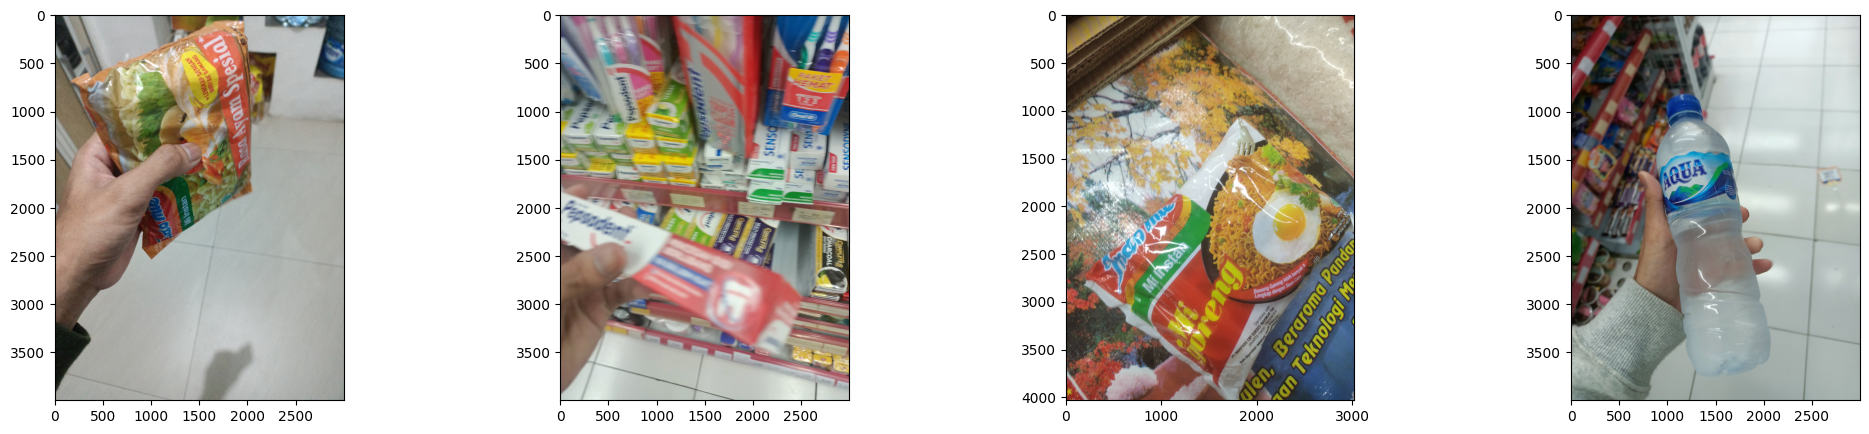

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (25,5))

for i, ax in enumerate(axes):
  images = plt.imread(df["path"].sample().values[0])
  ax.imshow(images)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm_notebook

In [ ]:
X = df['path']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
df_train = pd.DataFrame({
    'path' : X_train,
    'label' : y_train,
    'set' : 'train'
})
df_test = pd.DataFrame({
    'path' : X_test,
    'label' : y_test,
    'set' : 'test'
})
print(len(df_train))
print(len(df_test))

1076
269


In [ ]:
df_all = pd.concat([df_train, df_test])
print(df_all.groupby(['set', 'label']).size())
df_all.sample(5)

set    label               
test   Aqua 300Ml               20
       Bearbrand                26
       Chitato                  31
       Garnier Acno Fight       25
       Garnier Turbo Bright     26
       Indomie Ayam Spesial     19
       Mie Goreng               36
       Pepsodent                30
       Rexona Antibacterial     28
       Silverqueen               4
       Sunlight                 24
train  Aqua 300Ml               95
       Bearbrand               112
       Chitato                 115
       Garnier Acno Fight       99
       Garnier Turbo Bright    115
       Indomie Ayam Spesial    104
       Mie Goreng              132
       Pepsodent               101
       Rexona Antibacterial     90
       Silverqueen              23
       Sunlight                 90
dtype: int64


,path,label,set
684,/content/drive/MyDrive/Dataset/Pepsodent/IMG20...,Pepsodent,train
698,/content/drive/MyDrive/Dataset/Pepsodent/IMG20...,Pepsodent,train
46,/content/drive/MyDrive/Dataset/Garnier Acno Fi...,Garnier Acno Fight,train
482,/content/drive/MyDrive/Dataset/Indomie Ayam Sp...,Indomie Ayam Spesial,test
358,/content/drive/MyDrive/Dataset/Rexona Antibact...,Rexona Antibacterial,test


In [ ]:
datasource_path = "/content/drive/MyDrive/Dataset/"
dataset_path = "/content/drive/MyDrive/DatasetCapstone/"

In [ ]:
tqdm_notebook.pandas()

for index, row in tqdm_notebook(df_all.iterrows(), total=len(df_all)):
  #Make label folder inside of train and test folder
  if os.path.exists(os.path.join(dataset_path, row['set'], row['label'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['label']))
  
  #Make a file destination
  file_name = row['path'].split('/')[-1]
  file_destination = os.path.join(dataset_path, row['set'], row['label'], file_name)

  #copy file
  if os.path.exists(file_destination) == False:
    shutil.copy2(row['path'], file_destination)

  0%|          | 0/1345 [00:00<?, ?it/s]

In [ ]:
# Parameter input untuk network
dim = (255,255)
channel = (3, )
input_shape = dim + channel

# Batch Size
batch_size = 32

# Epoch
epoch = 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True,
                                   vertical_flip = True)

In [ ]:
train_generator = image_datagen.flow_from_directory('/content/drive/MyDrive/DatasetCapstone/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    # save_to_dir = '/content/drive/MyDrive/Dataset Capstone/augmentasi/',
                                                    shuffle=True)

test_generator = image_datagen.flow_from_directory('/content/drive/MyDrive/DatasetCapstone/test',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                # save_to_dir = '/content/drive/MyDrive/Dataset Capstone/augmentasi/',
                                                shuffle=True)

Found 1076 images belonging to 11 classes.
Found 269 images belonging to 11 classes.


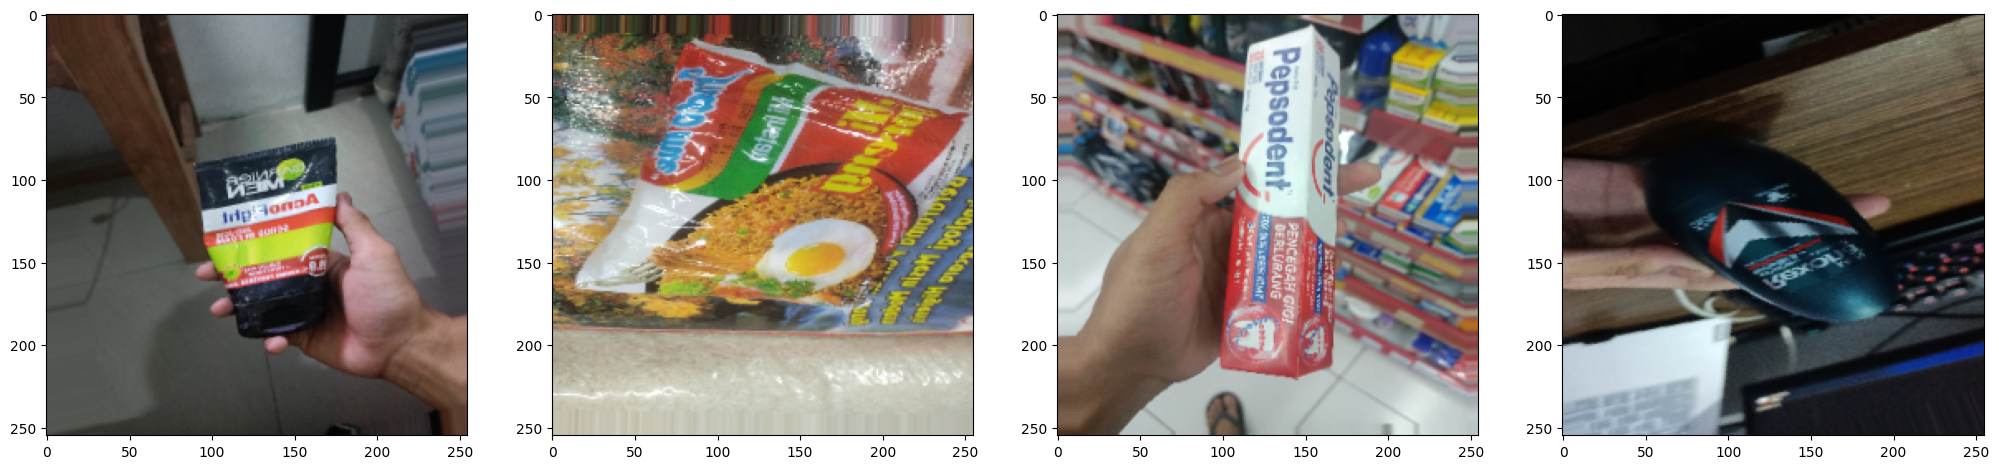

In [ ]:
images, labels = next(train_generator)

fig, axes = plt.subplots(nrows = 1, ncols=4, figsize=(25, 10))

for i in range(4):
  axes[i].imshow(images[i])
plt.show()

In [ ]:
test_generator.image_shape

(255, 255, 3)

In [ ]:
def tf_data_generator(generator, input_shape):
  num_class = generator.num_classes
  tf_generator = tf.data.Dataset.from_generator(
      lambda: generator,
      output_types=(tf.float32, tf.float32),
      output_shapes=([None
                      , input_shape[0]
                      , input_shape[1]
                      , input_shape[2]]
                      ,[None, num_class])
  )
  return tf_generator
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)

In [ ]:
train_data

<_FlatMapDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Membuat model dasar MobileNetV2 ================================
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(255, 255, 3))

# Membekukan bobot model dasar
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Flatten

# ===================================================
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax'))  # Jumlah kelas = 8, menggunakan fungsi aktivasi softmax


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 11)                14091     
                                                                 
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile the model
print('Compiling Model')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model


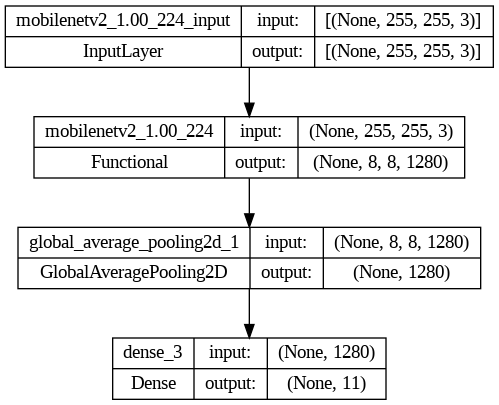

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualisasi plot model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
EPOCH = 5
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=test_data,
        validation_steps=len(test_generator),
        shuffle=True,
        verbose = 1)

Epoch 1/5
34/34 [==============================] - 304s 9s/step - loss: 1.3299 - accuracy: 0.6125 - val_loss: 0.5405 - val_accuracy: 0.9033
Epoch 2/5
34/34 [==============================] - 291s 9s/step - loss: 0.3757 - accuracy: 0.9461 - val_loss: 0.2461 - val_accuracy: 0.9628
Epoch 3/5
34/34 [==============================] - 341s 10s/step - loss: 0.2187 - accuracy: 0.9675 - val_loss: 0.2015 - val_accuracy: 0.9591
Epoch 4/5
34/34 [==============================] - 318s 10s/step - loss: 0.1435 - accuracy: 0.9842 - val_loss: 0.1265 - val_accuracy: 0.9740
Epoch 5/5
34/34 [==============================] - 270s 8s/step - loss: 0.1160 - accuracy: 0.9842 - val_loss: 0.1245 - val_accuracy: 0.9740


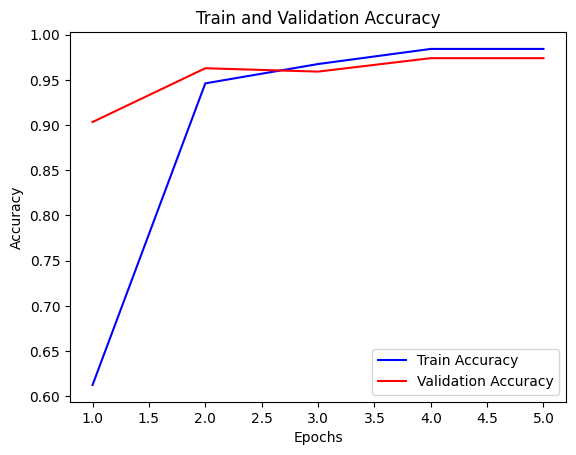

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Ambil jumlah epoch
epochs = range(1, EPOCH + 1)

# Plot akurasi pelatihan dan pengujian
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

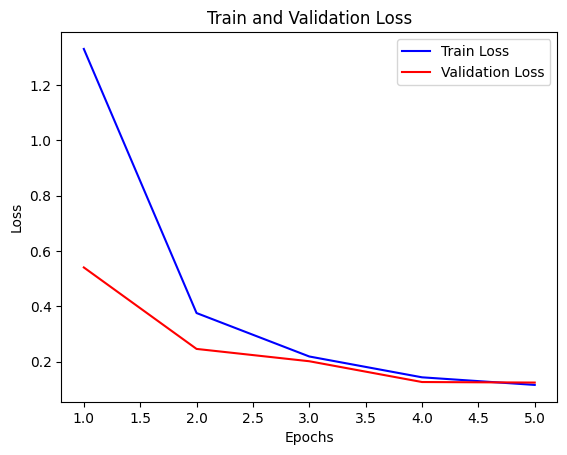

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Ambil jumlah epoch
epochs = range(1, EPOCH + 1)

# Plot akurasi pelatihan dan pengujian
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model MNV2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/model MNV2.h5...


In [ ]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9851 
Loss on training data: 0.1053 

Accuracy on test data: 0.9740 
Loss on test data: 0.1160 



In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
# Parameters
input_size = (255,255) # Bisa kalian ganti
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['Aqua 300ml', 'Bearbrand', 'Chitato', 'Garnier Acno Fight', 'Garnier Turbo Bright','Indomie Ayam Spesial', 'Mie Goreng', 'Pepsodent', 'Rexona Antibacterial', 'Silverqueen', 'Sunlight']

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/model/model MNV2.h5'
model = load_model(MODEL_PATH,compile=False)

In [ ]:
# read image
file_dir = '/content/drive/MyDrive/Test'
for i in(os.listdir(file_dir)):
  im = Image.open(os.path.join(file_dir,i))
  X = preprocess(im,input_size)
  X = reshape([X])
  y = model.predict(X)
  # plt.imshow(im)
  # plt.axis("off")
  print("Nama Produk = ", i)
  print(labels[np.argmax(y)], np.max(y))

1/1 [==============================] - 0s 48ms/step
Nama Produk =  Garnier Acno Fight.jpg
Garnier Acno Fight 0.6642846
1/1 [==============================] - 0s 42ms/step
Nama Produk =  Garnier Acno Fight (1).jpg
Garnier Acno Fight 0.9689086
1/1 [==============================] - 0s 50ms/step
Nama Produk =  Garnier Acno Fight (ketutup).jpg
Garnier Acno Fight 0.9592353
1/1 [==============================] - 0s 50ms/step
Nama Produk =  Garnier turbo bright(jauh).jpg
Garnier Turbo Bright 0.6828857
1/1 [==============================] - 0s 50ms/step
Nama Produk =  Garnier Turbo BRight.jpg
Garnier Turbo Bright 0.5404094
1/1 [==============================] - 0s 44ms/step
Nama Produk =  Rexona (jauh).jpg
Rexona Antibacterial 0.96627533
1/1 [==============================] - 0s 46ms/step
Nama Produk =  Rexona (dekat).jpg
Rexona Antibacterial 0.89784664
1/1 [==============================] - 0s 44ms/step
Nama Produk =  mie2.jpg
Indomie Ayam Spesial 0.6189765
1/1 [==============================